Tarea 1 - Proyecto 

## Introduccion
El tren de potencia de un camion minero consta de varios componentes importantes que le permiten poder acarrear grandes cantidades de material esteril (tierra) o material mineral. Entre estos componentes se encuentra la servo transmision, la cual contiene un conjunto de embragues que asociados entre si dan lugar a las diferentes velocidades del equipo.
Este componente es un eslabon fragil del tren de potencia porque podria ser afectado por una mala operacion, por un deficiente mantenimiento o por una mala reconstruccion. Debido a esto es de gran analisis para el equipo de confiabilidad y de planeacion. 
Con base en esta informacion se requiere poder pronosticar cuanto sera el consumo de este componente en los proximos meses.
La informacion historica con la que se cuenta es el consumo mensual desde el año 2010.



In [ ]:

pip install openpyxl


In [2]:
import pandas as pd

# Cargar el archivo Excel usando la ruta correcta
ruta_archivo = r'C:\Users\erodr\Downloads\Series de tiempo.xlsx'
df = pd.read_excel(ruta_archivo, sheet_name='Export Worksheet')

# Convertir la columna 'FECHA' a formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y%m%d')

# Extraer año y mes de la columna 'FECHA'
df['Year'] = df['FECHA'].dt.year
df['Month'] = df['FECHA'].dt.month

# Agrupar por Año y Mes para totalizar el consumo
consumo_mensual = df.groupby(['Year', 'Month']).size().reset_index(name='Consumption')

# Mostrar los primeros resultados del nuevo DataFrame
print(consumo_mensual)

# Guardar los resultados a un nuevo archivo Excel
consumo_mensual.to_excel('consumo_mensual.xlsx', index=False)


     Year  Month  Consumption
0    2010      9           12
1    2010     10            4
2    2010     11            5
3    2010     12            2
4    2011      2            3
..    ...    ...          ...
157  2024      5            8
158  2024      6           11
159  2024      7            4
160  2024      8            9
161  2024      9            4

[162 rows x 3 columns]


In [ ]:
pip install statsmodels

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\Users\erodr\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


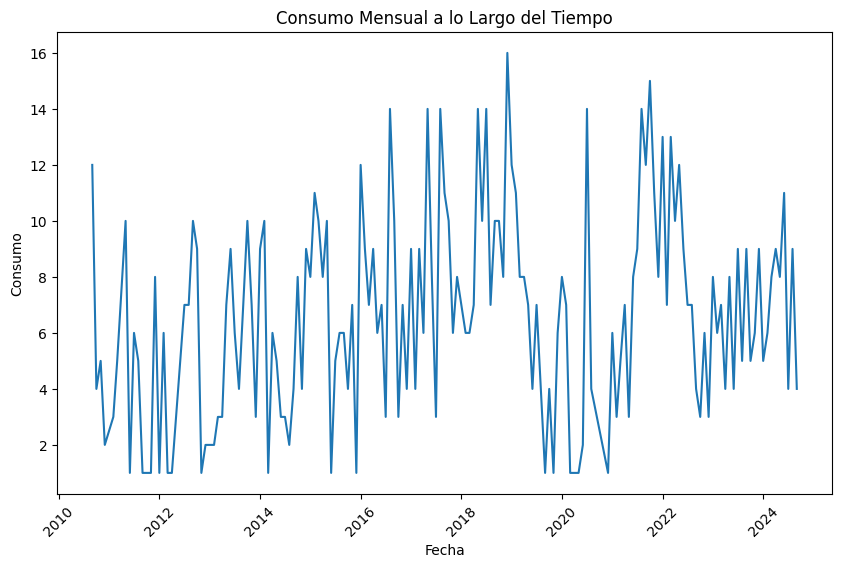

In [6]:
consumo_mensual['Date'] = pd.to_datetime(consumo_mensual[['Year', 'Month']].assign(DAY=1))

# Gráfico de líneas para observar la tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Consumption', data=consumo_mensual)
plt.title('Consumo Mensual a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.xticks(rotation=45)
plt.show()

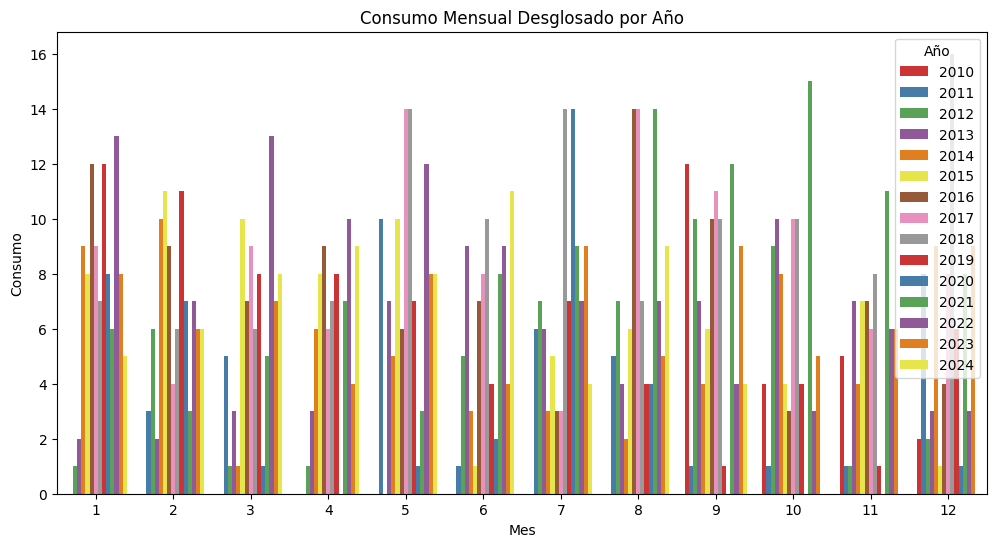

In [7]:
# Gráfico de barras agrupado por año y mes
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Consumption', hue='Year', data=consumo_mensual, palette='Set1')
plt.title('Consumo Mensual Desglosado por Año')
plt.xlabel('Mes')
plt.ylabel('Consumo')
plt.legend(title='Año', loc='upper right')
plt.show()

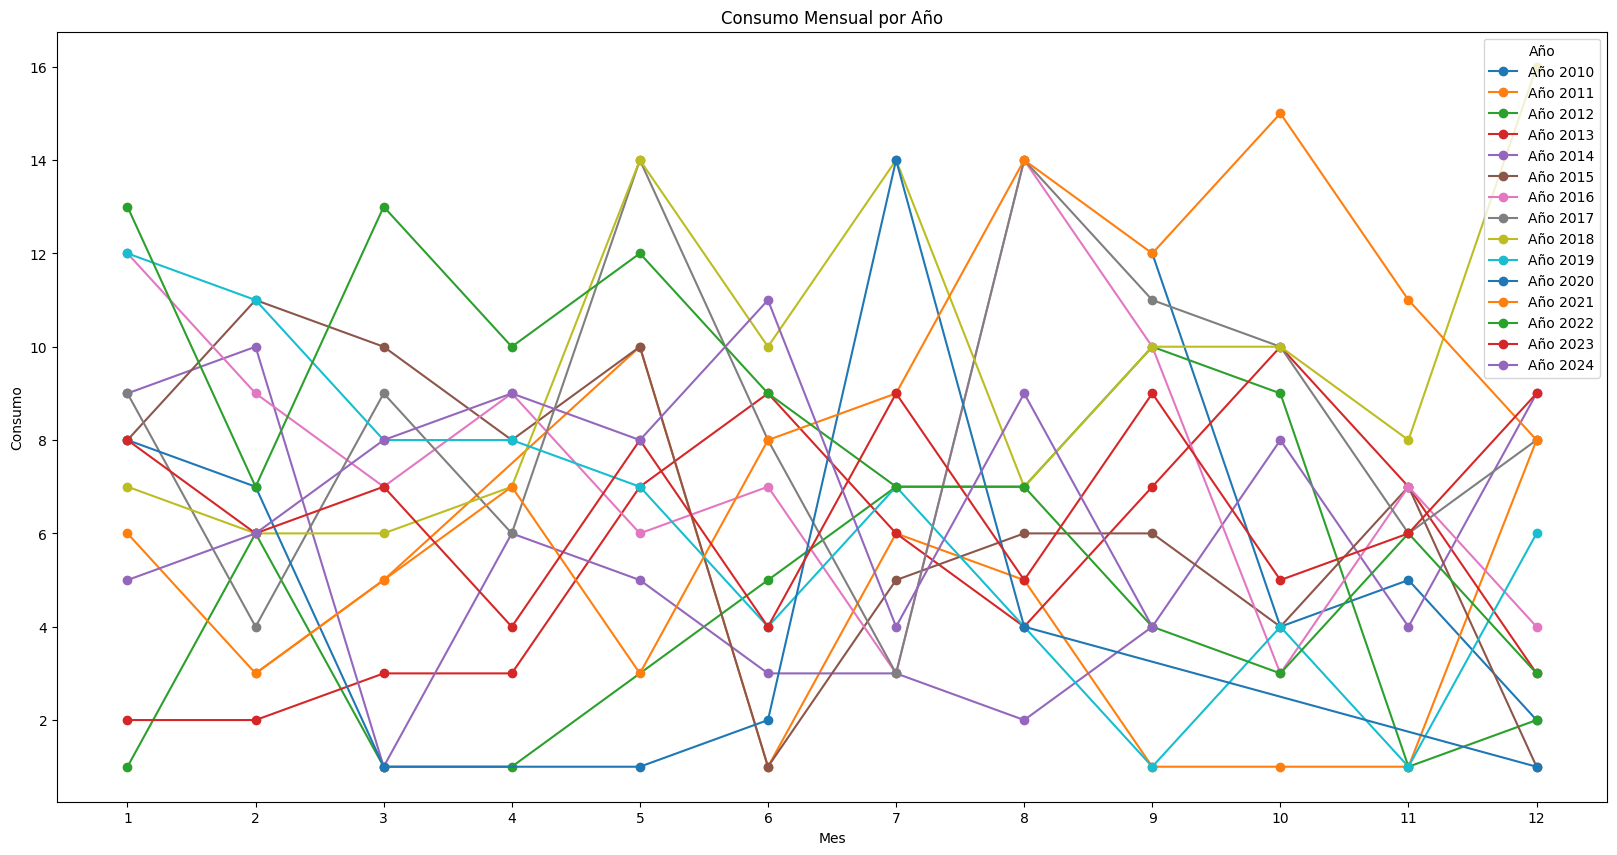

In [8]:
# Gráfico de líneas por cada año
plt.figure(figsize=(20, 10))
for year in consumo_mensual['Year'].unique():
    data = consumo_mensual[consumo_mensual['Year'] == year]
    plt.plot(data['Month'], data['Consumption'], marker='o', label=f'Año {year}')

plt.title('Consumo Mensual por Año')
plt.xlabel('Mes')
plt.ylabel('Consumo')
plt.legend(title='Año', loc='upper right')
plt.xticks(ticks=range(1, 13))
plt.show()

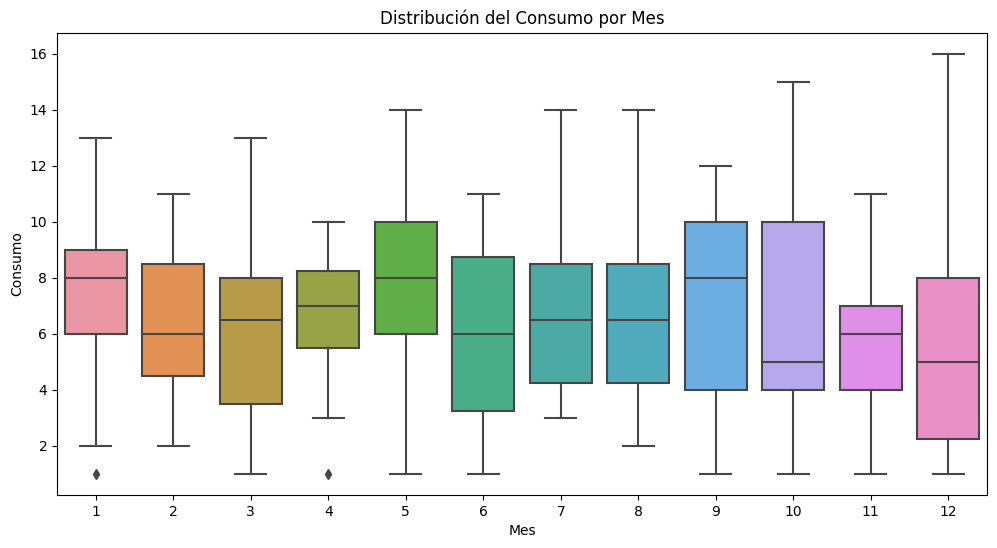

In [9]:
# Gráfico de caja para mostrar la distribución del consumo por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Consumption', data=consumo_mensual)
plt.title('Distribución del Consumo por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo')
plt.show()

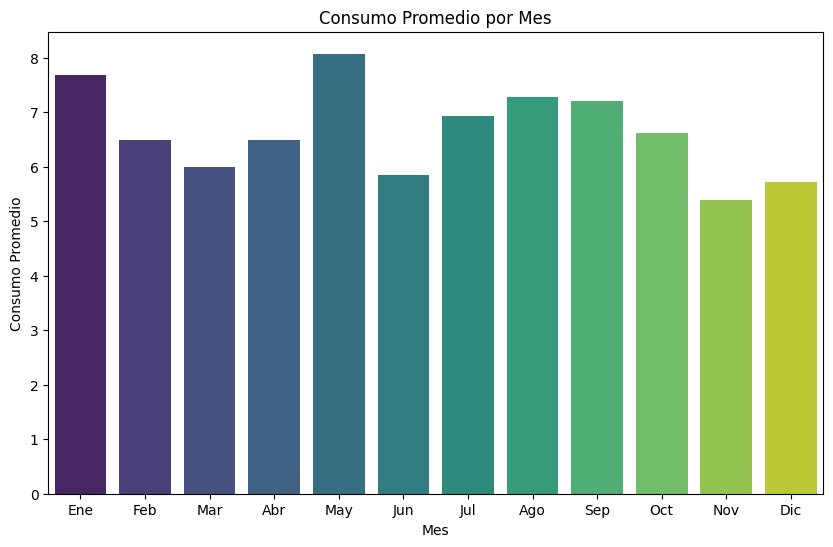

In [10]:
# Calcular el consumo promedio por mes
consumo_promedio_mensual = consumo_mensual.groupby('Month')['Consumption'].mean().reset_index()

# Gráfico de barras del consumo promedio por mes
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Consumption', data=consumo_promedio_mensual, palette='viridis')
plt.title('Consumo Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

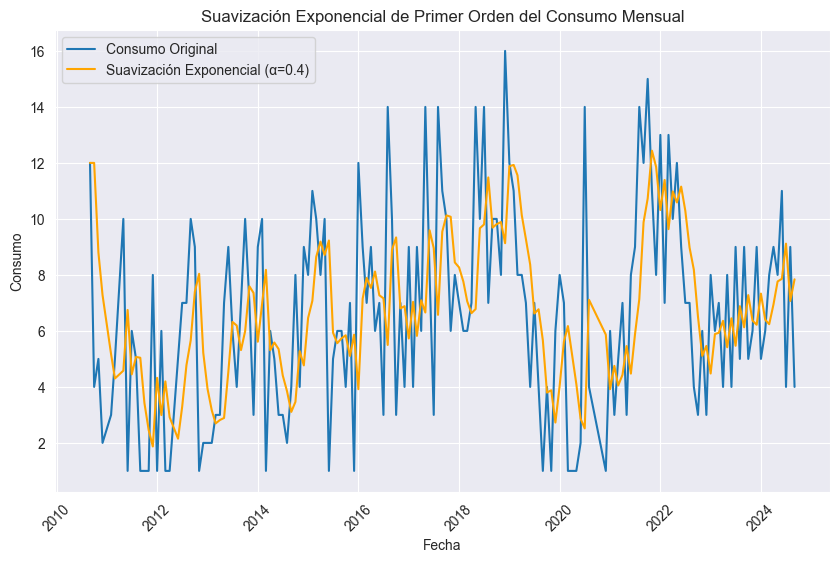

In [16]:
# Convertir la serie de consumo mensual a una serie de tiempo
consumo_ts = pd.Series(data=consumo_mensual['Consumption'].values, index=consumo_mensual['Date'])

# Aplicar suavización exponencial de primer orden
modelo = SimpleExpSmoothing(consumo_ts).fit(smoothing_level=0.4, optimized=False)
suavizacion_exponencial = modelo.fittedvalues

# Graficar la serie original y la suavización
plt.figure(figsize=(10, 6))
plt.plot(consumo_ts, label='Consumo Original')
plt.plot(suavizacion_exponencial, label='Suavización Exponencial (α=0.4)', color='orange')
plt.title('Suavización Exponencial de Primer Orden del Consumo Mensual')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.xticks(rotation=45)
plt.show()